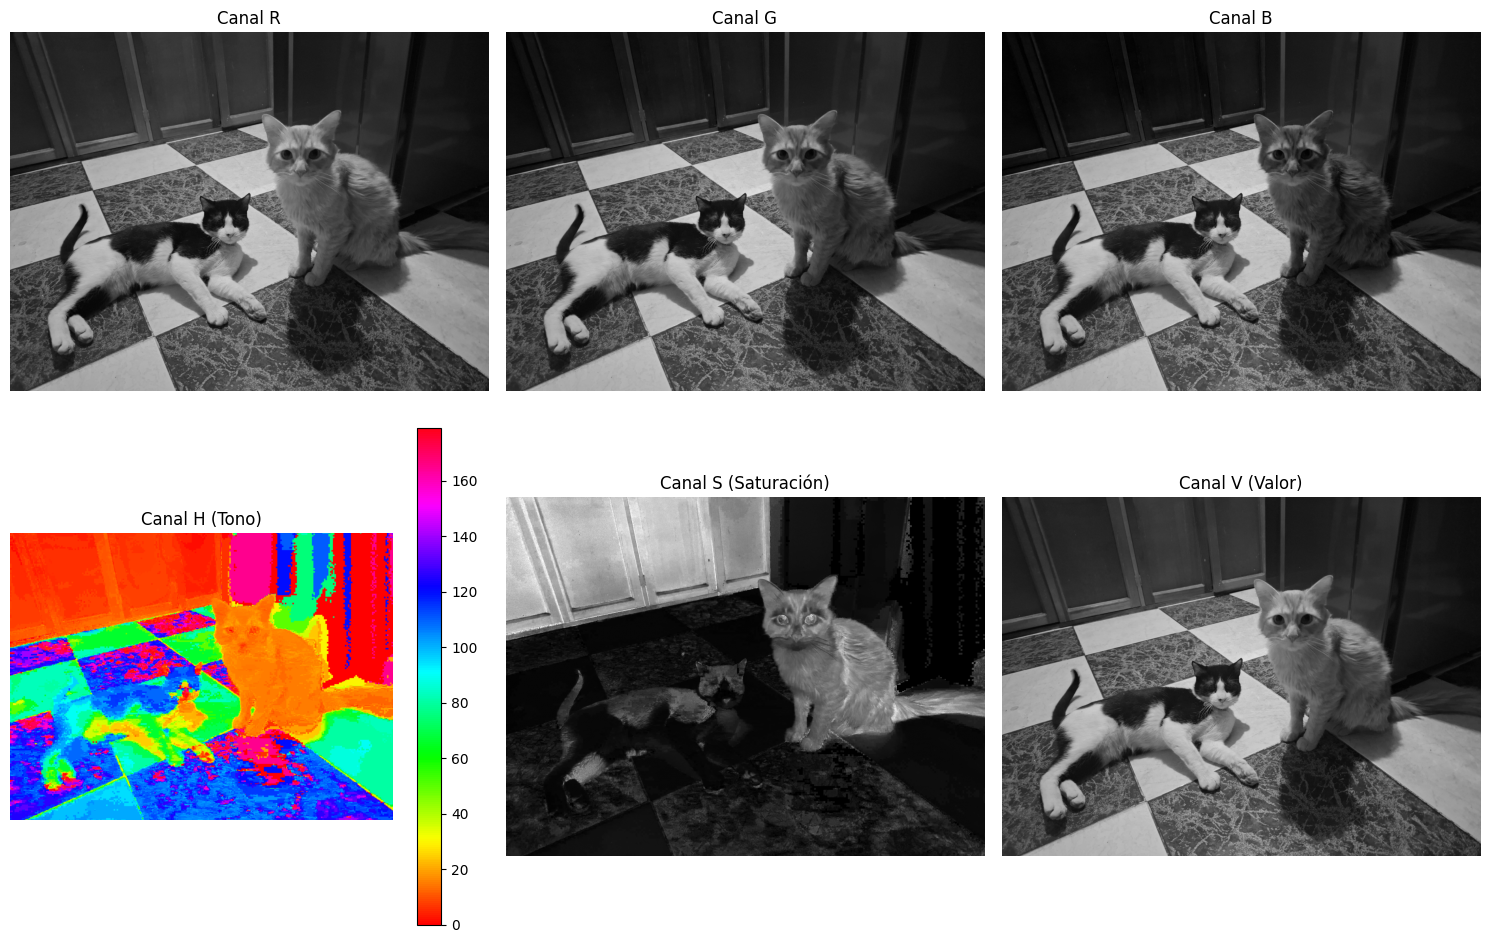

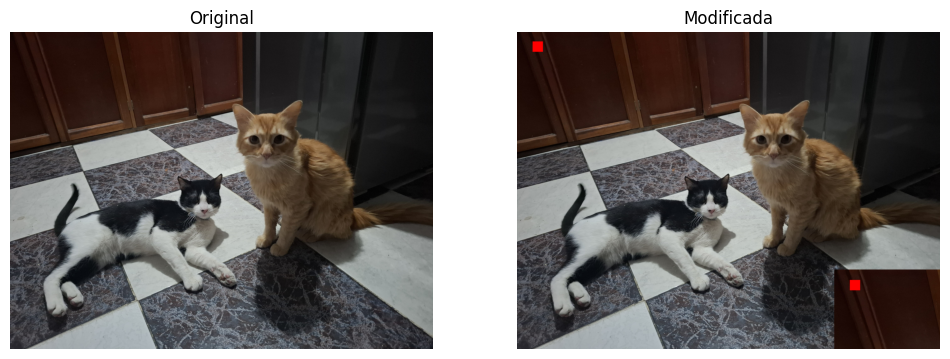

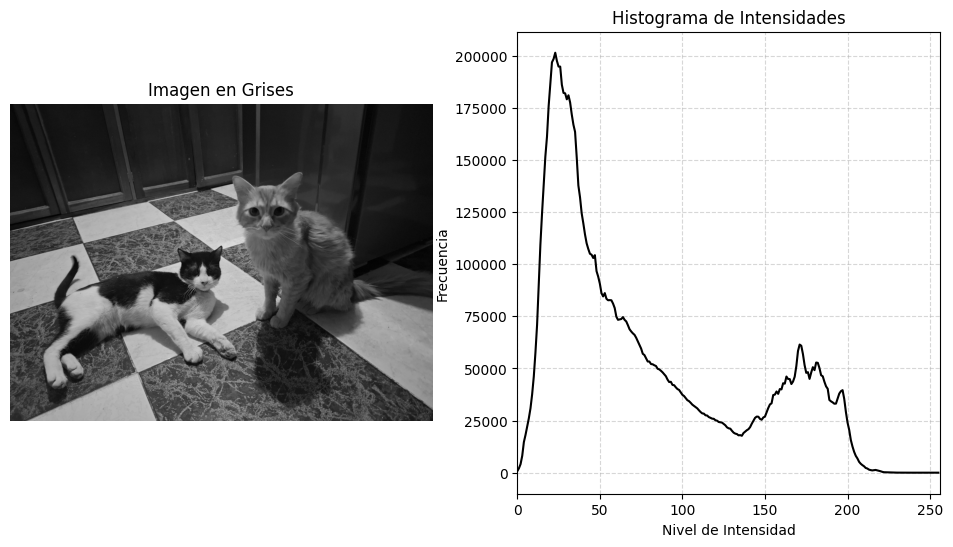

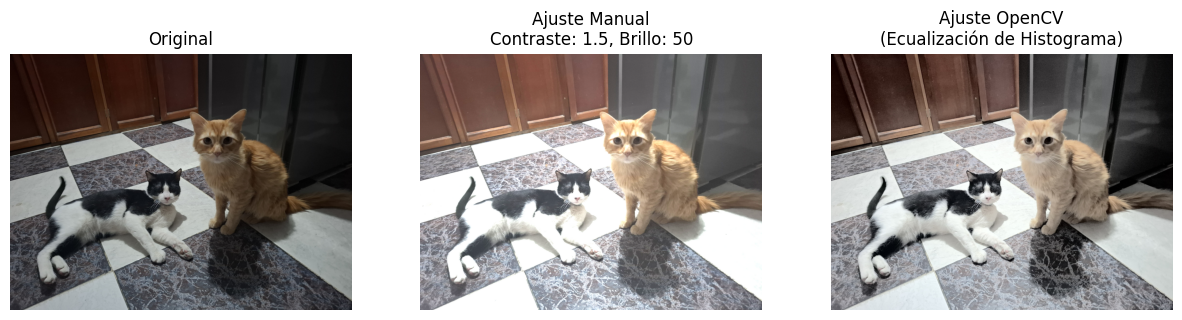

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Solo para Colab

# 1. Cargar imagen a color
img_path = '/content/MichiJuanP3.jpg'  # Reemplaza con tu imagen
img_bgr = cv2.imread(img_path)

if img_bgr is None:
    print("Error al cargar la imagen. Verifica la ruta.")
else:
    # Convertir a RGB para visualización con matplotlib
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # 2. Mostrar canales RGB y HSV por separado
    plt.figure(figsize=(15, 10))

    # Canal R (Rojo)
    plt.subplot(2, 3, 1)
    plt.imshow(img_rgb[:,:,0], cmap='gray')
    plt.title('Canal R')
    plt.axis('off')

    # Canal G (Verde)
    plt.subplot(2, 3, 2)
    plt.imshow(img_rgb[:,:,1], cmap='gray')
    plt.title('Canal G')
    plt.axis('off')

    # Canal B (Azul)
    plt.subplot(2, 3, 3)
    plt.imshow(img_rgb[:,:,2], cmap='gray')
    plt.title('Canal B')
    plt.axis('off')

    # Convertir a HSV
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Canal H (Tono)
    plt.subplot(2, 3, 4)
    plt.imshow(img_hsv[:,:,0], cmap='hsv')
    plt.title('Canal H (Tono)')
    plt.axis('off')
    plt.colorbar()

    # Canal S (Saturación)
    plt.subplot(2, 3, 5)
    plt.imshow(img_hsv[:,:,1], cmap='gray')
    plt.title('Canal S (Saturación)')
    plt.axis('off')

    # Canal V (Valor)
    plt.subplot(2, 3, 6)
    plt.imshow(img_hsv[:,:,2], cmap='gray')
    plt.title('Canal V (Valor)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # 3. Modificación de regiones con slicing

    # Copia para modificar
    img_mod = img_rgb.copy()

    # a) Cambiar color de un área rectangular (píxeles 100:200, 150:250 a rojo)
    img_mod[100:200, 150:250] = [255, 0, 0]  # Rojo en RGB

    # b) Sustituir una región por otra (copiar esquina superior izquierda a inferior derecha)
    h, w = img_mod.shape[:2]
    region = img_mod[0:h//4, 0:w//4]  # Tomar región
    img_mod[3*h//4:h, 3*w//4:w] = cv2.resize(region, (w//4, h//4))  # Pegar redimensionada

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_mod)
    plt.title('Modificada')
    plt.axis('off')
    plt.show()

    # 4. Histograma de intensidades
    gray_img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Imagen en Grises')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    plt.plot(hist, color='black')
    plt.title('Histograma de Intensidades')
    plt.xlabel('Nivel de Intensidad')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 256])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

    # 5. Ajustes de brillo y contraste

    # a) Manualmente con ecuación: new_img = alpha*img + beta
    alpha = 1.5  # Control de contraste (>1 aumenta)
    beta = 50    # Control de brillo (0-100)
    manual_adj = cv2.convertScaleAbs(img_bgr, alpha=alpha, beta=beta)

    # b) Con OpenCV (ecualización de histograma para mejor contraste)
    # Para imágenes en color, convertimos a YCrCb y ecualizamos solo el canal Y (luminancia)
    ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])
    opencv_adj = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

    # Mostrar resultados
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(manual_adj, cv2.COLOR_BGR2RGB))
    plt.title(f'Ajuste Manual\nContraste: {alpha}, Brillo: {beta}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(opencv_adj, cv2.COLOR_BGR2RGB))
    plt.title('Ajuste OpenCV\n(Ecualización de Histograma)')
    plt.axis('off')

    plt.show()